In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import missingno as msno
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

#Loading the Dataset

In [ ]:
data=pd.read_csv('voice.csv')
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


#Data Preprocessing

In [ ]:
data.shape

(3168, 21)

In [ ]:
data.index

RangeIndex(start=0, stop=3168, step=1)

In [ ]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
data.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

#Univariate Analysis

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
def calc_limits(feature):
    q1,q3=data[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [ ]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data,x=feature,ax=axes[0])
    sns.distplot(a=data[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

    lower,upper = calc_limits(feature)
    l=[data[feature] for i in data[feature] if i>lower and i<upper]
    print("Number of data points remaining if outliers removed : ",len(l))


Number of data points remaining if outliers removed :  3104


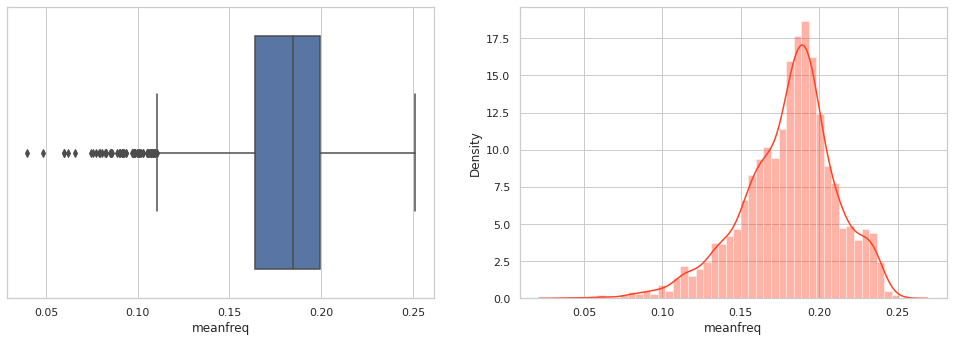

In [ ]:
plot('meanfreq')

In [ ]:
data['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

#Bivariate Analysis

In [ ]:
temp = []
for i in data.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
data['label'] = temp

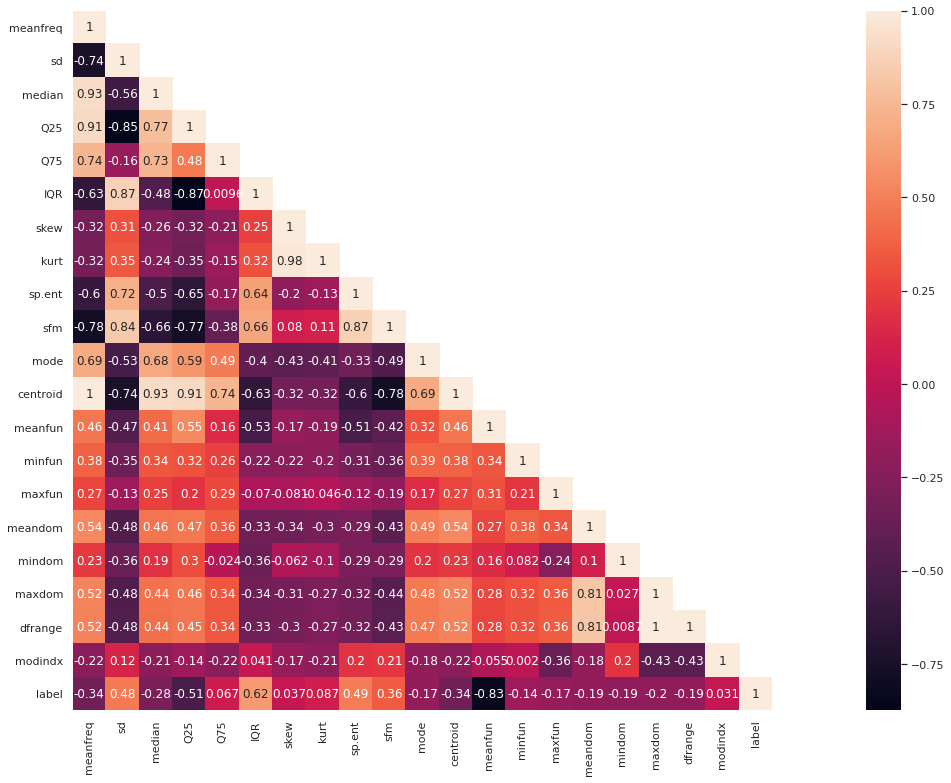

In [ ]:
cor_mat= data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
def plot_against_target(feature):
    sns.factorplot(data=data,y=feature,x='label',kind='box')
    fig=plt.gcf()
    fig.set_size_inches(7,7)

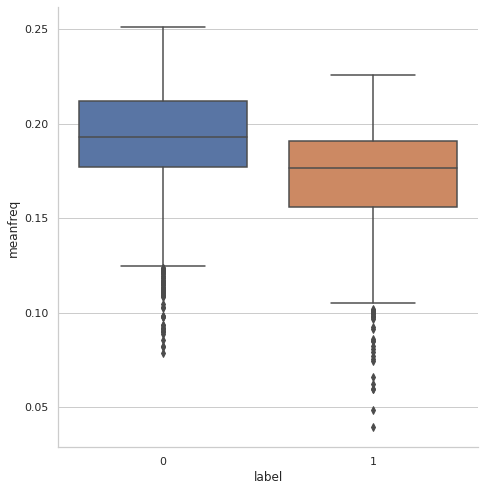

In [ ]:
plot_against_target('meanfreq')

# Outlier Treatment

In [ ]:
for col in data.columns:
    lower,upper=calc_limits(col)
    data = data[(data[col] >lower) & (data[col]<upper)]

In [ ]:
data.shape

(1607, 21)

In [ ]:
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,1.562304,7.834350,0.938546,0.538810,0.050129,0.190846,0.113323,0.017544,0.275862,1.434115,0.007812,6.320312,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,2.704335,18.484703,0.934523,0.559742,0.060033,0.168346,0.083484,0.015717,0.231884,0.146563,0.007812,3.125000,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,2.587325,12.281432,0.915284,0.475317,0.059957,0.181015,0.098643,0.016145,0.275862,0.209844,0.007812,3.695312,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,3.736487,21.666669,0.876749,0.403910,0.134411,0.175659,0.132726,0.016563,0.228571,0.257812,0.007812,0.648438,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,2.576732,10.110125,0.875392,0.436706,0.120000,0.174826,0.124685,0.016754,0.250000,0.799006,0.007812,4.171875,4.164062,0.205816,1


#Feature Engineering

In [ ]:
temp_data=data.copy()
temp_data.drop(['skew','kurt','mindom','maxdom'],axis=1,inplace=True)
temp_data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.190846,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.168346,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.181015,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.175659,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.174826,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


#Creating new features

In [ ]:
temp_data['meanfreq']=temp_data['meanfreq'].apply(lambda x:x*2)
temp_data['median']=temp_data['meanfreq']+temp_data['mode']
temp_data['median']=temp_data['median'].apply(lambda x:x/3)

In [ ]:
temp_data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1


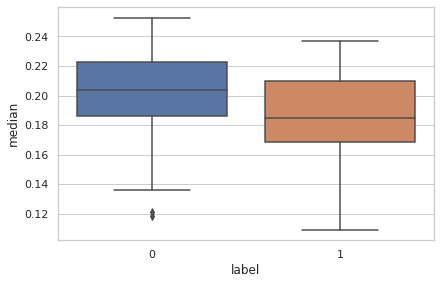

In [ ]:
sns.boxplot(data=temp_data,y='median',x='label')

In [ ]:
temp_data['pear_skew']=temp_data['meanfreq']-temp_data['mode']
temp_data['pear_skew']=temp_data['pear_skew']/temp_data['sd']
temp_data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,dfrange,modindx,label,pear_skew
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1,3.031150
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1,2.097126
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1,1.923371
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1,2.891735
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1,0.837952


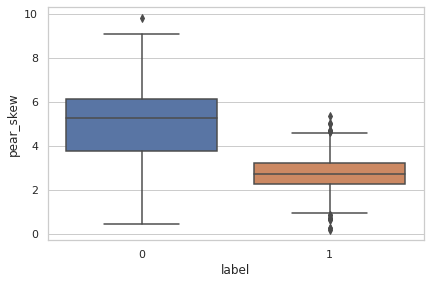

In [ ]:
sns.boxplot(data=temp_data,y='pear_skew',x='label')

#Preparing the Data

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(temp_data.drop('label',axis=1))
X=scaled_data
Y=data['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

#Modelling
LOGISTIC REGRESSSION

In [ ]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.9906832298136646


kNN

In [ ]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.9782608695652174


Support Vector Machine (SVM)

In [ ]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

0.9906832298136646


DECISION TREE

In [ ]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))

0.9813664596273292


RANDOM FOREST

In [ ]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.984472049689441


GRADIENT BOOSTING

In [ ]:
clf_gb=GradientBoostingClassifier()
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
print(accuracy_score(pred,y_test))

0.9813664596273292


In [ ]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))

d={'Modelling Algo':model_names,'Accuracy':acc}

In [ ]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.990683
1,LinearSVM,0.987578
2,rbfSVM,0.990683
3,KNearestNeighbors,0.978261
4,RandomForestClassifier,0.987578
5,DecisionTree,0.959627
6,GradientBoostingClassifier,0.981366
7,GaussianNB,0.950311


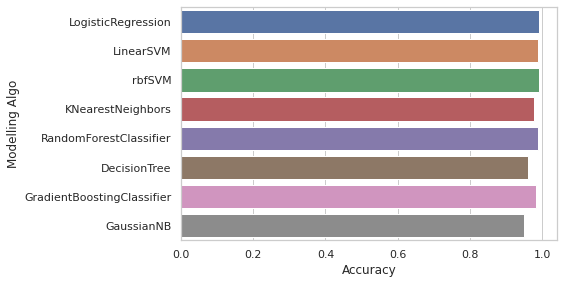

In [ ]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

In [ ]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
clf.best_score_

0.9828670058139535

In [ ]:
clf.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
print(accuracy_score(clf.predict(x_test),y_test))

0.9906832298136646


In [ ]:
print(precision_score(clf.predict(x_test),y_test))

0.9837837837837838


The precision is almost 99.5 % which is quite high.

After tuning SVM gives an amazing accuracy of around 99.1 %.

Similarly tuning other algorithms parameters might give even greater accuracy.